 # <center>Lecture 2: Bayes' Rule  </center>  
 
 ## <center> Instructor: Dr. Hu Chuan-Peng  </center>

## Part 1: 【和鲸平台】整合教学+练习

本学期的贝叶斯课程将通过和鲸平台进行授课与代码练习，请大家提前注册好和鲸平台的账号。  

关于和鲸平台的运行环境设置说明如下：  

![Image Name](https://cdn.kesci.com/upload/sjmwr1smy0.jpeg?imageView2/0/w/960/h/960)  

![Image Name](https://cdn.kesci.com/upload/sjmwr8pj5w.jpeg?imageView2/0/w/960/h/960)  



更重要的是：任何问题都可以微信群或者平台里发帖提问。  

助教和老师会尽快回复的 🚀。  


![Image Name](https://cdn.kesci.com/upload/sjkvf5nlsl.jpeg?imageView2/0/w/960/h/960)  

![Image Name](https://cdn.kesci.com/upload/sjkvfd5d65.jpeg?imageView2/0/w/960/h/960)  



当然，你也可以选择在gitee上进行提问。  
点击链接访问gitee：  
https://gitee.com/hcp4715/bayesian-analysis-nnupsy  

![Image Name](https://cdn.kesci.com/upload/sjkvfsm4c1.jpeg?imageView2/0/w/960/h/960)  


 ## Part 2: 单一事件的贝叶斯模型

## **“让我们从一个每个人都熟悉的事件开始”**  

读文献时，大家是否有一个疑问：我看到的这个文章靠谱吗？  

![Image Name](https://cdn.kesci.com/upload/sjpbvjqzx2.jpg?imageView2/0/w/640/h/640)  


2015年，**开放科学合作组织（Open Science Collaboration）** 在《Science》杂志上发表文章，发现只有**36%～47%** 的认知/社会心理学研究成果能被成功重复。  

![Image Name](https://cdn.kesci.com/upload/sjos6fmkbs.png?imageView2/0/w/960/h/960)  


> Open Science Collaboration ,Estimating the reproducibility of psychological science.Science349,aac4716(2015).DOI:10.1126/science.aac4716

以这个论文为代表的系列讨论，引发了关于心理学“可重复性危机”的讨论[(胡传鹏等, 2018)](https://journal.psych.ac.cn/xlkxjz/CN/10.3724/SP.J.1042.2016.01504)。  

知道这个事实之后，对我们阅读文章时对结果的信念是否产生了影响？  

假设我们认同Science这个文章的结论，初步认为大约**40%** 的心理学实验是可重复的。我们以这个数据作为我们对文章的初步“信念”。  

新的关于心理学研究可重复性的研究是否会进一步改变我们的信念？

2024年，一项针对299项预注册的重复实验数据的研究发现，可重复研究通常以自信、透明和确切的语言撰写，而不可重复的研究则往往表现出模糊性，并使用“边缘型”的说服技巧。  

这个新研究可能帮助我们**更新**对心理学科学论文的预测。  

假定我们现在从上述299个文章中抽取出一篇论文，我们会如何评估它的可重复性？  

![Image Name](https://cdn.kesci.com/upload/sjoly6dhft.png?imageView2/0/w/960/h/960)  


> Herzenstein, M., Rosario, S., Oblander, S., & Netzer, O. (2024). The language of (non)replicable social science. Psychological Science, 9567976241254037. https://doi.org/10.1177/09567976241254037  


基于我们第一个研究（即认为大约40%的研究可以重复）和新证据（可重复性研究通常使用确切语言撰写），我们对随机抽取出的一项研究的可重复性的态度怎样呢？  

假如我们仅根据*Science*的研究结果，我们可能会认为这项研究大约有40%可能性被重复出来？但是这意味着2024年新研究的信息没有被用上。  

根据Herzenstein 等（2024）的研究结果，可重复的研究中，有56%的文章使用确切的语言风格；在不可重复的研究中，使用确切语言的比例为为45%。  

根据这些信息，我们可以得到以下几个关键信息：  
- 心理学研究可重复的概率为40%  
- 心理学研究不可重复的概率为60%  
- 可重复的研究中，使用确切语言的概率为56%  
- 不可重复的研究中，使用确切语言的概率为45%  


![Image Name](https://cdn.kesci.com/upload/sjoxpj2ivv.png?imageView2/0/w/640/h/640)

根据上述信息，现在我们可以进行以下的简单的运算：  

- 研究可重复且使用确切语言的概率 $P = 0.40 \times 0.56 = 0.224$  
- 研究可重复但不使用确切语言的概率 $P= 0.40 * (1-0.56) = 0.176$  
- 研究不可重复但使用确切语言的概率 $P= 0.60 * 0.45 = 0.27$  
- 研究不可重复且不使用确切语言的概率 $P= 0.60 * (1-0.45) = 0.33$  


![Image Name](https://cdn.kesci.com/upload/sjp0bqwjgl.png?imageView2/0/w/960/h/960)  



假如我们抽取出一个文章使用了确切的语言风格，我们认为它可重复的可能性是多少呢？  

$0.224/(0.224 + 0.27) = 0.453$

在这个简单的例子当中，我们实际进行了一次“贝叶斯的证据更新”。  

接下来我们再来重新审视一下这个事例。  

我们选取Herzenstein 等（2024）年的部分真实数据进行探索，包括研究的编号 (title)，文章是否可被重复 (replicated), 文章结果描述的确切性 (certain)和文章表述的积极性 (posemo)。

In [1]:
# 非选课的同学，可以使用和鲸社区的Python镜像，运行以下的代码安装必要的模块，需要3-5分钟的时间完成加载
# 后续会有专门的社区公开镜像，给大家提前配置好运行环境
# 将下列代码行解除注释，删除“#”，运行即可：
# !conda install -y graphviz bambi=0.13.0 pymc=5.16.2 PreliZ=0.9.0 ipympl=0.9.4 pingouin=0.5.4

# docker部署和使用教程链接：https://zhuanlan.zhihu.com/p/719739087
# docker pull hcp4715/pybaysian:latest
# docker run -it --rm -p 8888:8888 hcp4715/pybaysian:latest

In [18]:
# 导入数据加载和处理包：pandas
import pandas as pd
# 导入数字和向量处理包：numpy
import numpy as np
# 导入基本绘图工具：matplotlib
import matplotlib.pyplot as plt

# 使用 pandas 导入示例数据
try:
  df = pd.read_csv("/home/mw/input/bayes3797/replicated_language_cleaned.csv") 
except:
  df= pd.read_csv('data/replicated_language_cleaned.csv')

df = df.drop('study_name', axis=1)
df.head()

# 设置APA 7的画图样式
plt.rcParams.update({
    'figure.figsize': (4, 3),      # 设置画布大小
    'font.size': 12,               # 设置字体大小
    'axes.titlesize': 12,          # 标题字体大小
    'axes.labelsize': 12,          # 轴标签字体大小
    'xtick.labelsize': 12,         # x轴刻度字体大小
    'ytick.labelsize': 12,         # y轴刻度字体大小
    'lines.linewidth': 1,          # 线宽
    'axes.linewidth': 1,           # 轴线宽度
    'axes.edgecolor': 'black',     # 设置轴线颜色为黑色
    'axes.facecolor': 'white',     # 轴背景颜色（白色）
    'xtick.direction': 'in',       # x轴刻度线向内
    'ytick.direction': 'out',      # y轴刻度线向内和向外
    'xtick.major.size': 6,         # x轴主刻度线长度
    'ytick.major.size': 6,         # y轴主刻度线长度
    'xtick.minor.size': 4,         # x轴次刻度线长度（如果启用次刻度线）
    'ytick.minor.size': 4,         # y轴次刻度线长度（如果启用次刻度线）
    'xtick.major.width': 1,        # x轴主刻度线宽度
    'ytick.major.width': 1,        # y轴主刻度线宽度
    'xtick.minor.width': 0.5,      # x轴次刻度线宽度（如果启用次刻度线）
    'ytick.minor.width': 0.5,      # y轴次刻度线宽度（如果启用次刻度线）
    'ytick.labelleft': True,       # y轴标签左侧显示
    'ytick.labelright': False      # 禁用y轴标签右侧显示
})

In [3]:
df.head()

### 先验 (prior) 和 数据 (data)  

重新回顾我们要评估的事件：我们认为从299项心理学研究中随机选出来的一项研究的可重复性如何？  

在评估这个事件之前，我们知道Science于2015年发表了一个大规模重复实验，发现40%的心理学研究是可以被重复出来。  

对于这299项研究，它们有不同的语言风格：

In [4]:
# 数据预处理
# 计算 'certain' 列的中位数
median_certain = df['certain'].median()

# 创建新列，编码规则：大于中位数为 1，小于等于中位数为 2
df['language_style'] = df['certain'].apply(lambda x: 1 if x > median_certain else 0)

# 输出结果
df.head()

研究能否被重复出来，与他们的语言风格有关系：  

有 56%（71/126）的能被重复的研究使用了确切的语言风格；  

约45%（78/173）的不能被重复研究使用了确切的语言风格。

In [5]:
# 计算不同水平的数量和百分比
level_counts = df['replicated'].value_counts()
level_percentages = df['replicated'].value_counts(normalize=True) * 100

# 百分比保留两位小数
level_percentages = level_percentages.round(2)

# 创建一个新的 DataFrame 合并结果
result_df1 = pd.DataFrame({'数量': level_counts, '百分比': level_percentages})
# 展示结果(0代表不可重复，1代表可重复)
result_df1

In [6]:
# 计算不同水平的数量
result_df2 = df.groupby(['replicated', 'language_style']).size().unstack()
# 结果
result_df2

### 先验 (prior) 和 数据 (data)  

#### 先验  

在我们这个事件中，我们评估某项研究可重复性之前，我们关于研究可重复性的信念，在贝叶斯统计中被称为先验（prior）。  

假设我们的信念被2015年Science的文章所影响，相信约40%的心理学实验是可重复的。这就是我们开始了解这项研究前的信念。  

- 先验（prior）：指没有观察到具体数据之前，根据已有知识、经验或主观判断对某个事件发生概率的初步估计。  

本例中，40%的估计代表了我们基于已有文献和领域经验的先验信念——即在没有观察具体文章之前，推测它有40%的研究能够成功重复。  


#### 先验 vs 数据  

在了解到被评估的研究来自Herzenstein 等（2024）之后，我们又获得了新的信息，这个新信息我们将其称为数据（data）。  

此时，我们会有两个信息：  

- 先验信息 (prior)：约 40% 的研究是可重复。  
- 数据 (data) ：有 56%能被重复的研究使用了确切的语言风格；约45%不能被重复研究使用了确切的语言风格。  

我们会如何推断？

在先验和数据之间找到平衡？  

这正是贝叶斯的思路：基于数据对先验进行更新。  

$$  
Posterior = \frac {data * \, prior}{Average \, probability \, of \, data}  
$$  

![Image Name](https://cdn.kesci.com/upload/sjkvl0f6gx.png?imageView2/0/w/960/h/960)  

#### 先验概率(Prior probability)  
我们现在使用更加正式一点的语言来对上述的信息进行描述：  

假如一项心理学研究**能**被其他研究者独立地重复出来，我们认为一个特定的事件发生了。  

我们将这个事件使用$B$来表示。  

假如一项心理学研究**不能**被其他研究者独立地重复出来，我们认为一个特定的事件**没有**发生了，使用符号$B^{c}$(B的补集complement)。  

根据Science于2015年的文章，我们可以得以下公式：  

$$  
P(B) = 0.40 \\  

P(B^{c}) = 0.60  
$$  

<style>  
table {  
    width: 100%;  
    table-layout: auto;  
}  
</style>  

| 事件       | **$B$**   | **$B^{c}$** | **Total** |  
|------------|-----------|-------------|-----------|  
| **probability** | **0.4** | **0.6**     | **1**     |  


换一句话说，在我们对需要被评估的研究进行评估前，我们关于事件$B$的先验信念是$P(B)$，这也被称为先验模型(prior model)  

作为一个有效的概率模型(valid probability model)，它必须：  

（1）考虑所有可能的事件（所有文章都必须是可重复或不可重复的，没有其他可能性）；  

（2）它为每个事件分配先验概率；  

（3）这些概率加起来为1。

### 数据模型（条件概率与似然性）  

借鉴先验模型的构建方式，我们同样可以采用模型（即公式）对关于目标研究的新信息进行正式地描述。  
- 我们用符号 $A$ 表示研究中使用了确切的语言风格。  

我们要将如下一句话的信息进行形式化：  

**有 56%能被重复的研究使用了确切的语言风格；约45%不能被重复研究使用了确切的语言风格。**  

**有 56%能被重复的研究使用了确切的语言风格，44%的能被重复的研究没有使用确切的语言风格；约45%不能被重复研究使用了确切的语言风格；55%的不能被重复的研究没有使用确切的语言风格。**  

将数据形式化，通过条件概率来量化文章展现出语言确切的可能性。具体如下：  

$$  
P(A|B) \approx 56\%  
$$  
- 当研究是可重复的，使用确切语言的概率大约 56%。  

$$  
P(A|B^{c}) \approx 45\%  
$$  
- 在研究不可重复的情况下，使用确切语言的概率大约为 45%。  




![Image Name](https://cdn.kesci.com/upload/sjq96jfv8f.png?imageView2/0/w/960/h/960)  


#### 条件概率  

条件概率：给定某个条件下发生另一件事情的概率。  
注意：条件概率的定义是有顺序的，$P(A|B)$ 与 $P(B|A)$ 并不相等。  

例如：  
- $P(A|B)$ 表示在研究可重复的情况下，使用确切语言的概率；  
- $P(B|A)$ 表示的是在研究使用确切语言的情况下，该研究是可重复的概率。  

很多时候，人们容易混淆这两者，尤其在贝叶斯推理中。因此，清楚条件的前提和结果是很重要的。

#### 似然(likelihood)  

**似然的定义**  

从条件概率中，我们知道 $P(A|B) = 0.56$ 和 $P(A|B^c) = 0.45$，即使用确切语言的研究更可能是可重复的。  

似然（likelihood）描述的是在不同假设下，某个数据模式出现的可能性。在这个例子中，我们比较两种假设:  
- $P(A|B) = 0.56$：在可重复研究的假设下，使用确切语言的概率较高。  
- $P(A|B^c) = 0.45$：在不可重复研究的假设下，使用确切语言的概率较低。  

因此，似然函数表明：当前数据模式（使用确切语言）在可重复的假设下更可能出现：  
$P(A|B) = 0.56 > P(A|B^{c}) = 0.45$  

这就是似然函数(likelihood function)的核心：反映了在不同的假设（可重复或不可重复）下，某个数据$A$出现的可能性。  


例如，针对“数据 A：研究使用确切语言”的似然可以写成：$L(*|A)$  
$$  
L(B|A) = P(A|B) \quad\quad L(B^{c}|A) = P(A|B^{c})  
$$  

上述两个式子分别表示在“研究可重复”和“研究不可重复”两种可能的情况下，使用确切语言的概率。  

*注意，在似然函数中，数据是已知发生的，而假设是可能发生的

#### 概率(Probability) vs 似然(likelihood)  

🤔概率和似然似乎都在表示某种可能性，它们的区别是什么呢？  
  
| 特性        | 概率 (Probability)                                      | 似然 (Likelihood)                                   |  
|-------------|---------------------------------------------------------|----------------------------------------------------|  
| 定义        | 已知假设条件，得到某个数据的可能性                           | 已知数据，不同假设条件下得到该数据的可能性     |  
| 范围        | [0, 1]                                                 | 不限于 [0, 1]                                     |  
| 总和        | 所有可能事件的总和为1                                  | 可以不等于1                                       |  
| 应用        | 预测和决策                                           | 模型估计和选择                                     |  

注意：  
* 先验概率的总和等于1，因为先验表示所有可能结果的分布，表示事件B发生的概率，是我们的主观推测；  
* 似然总和不等于1，因为似然函数不是概率函数，它告诉我们事件A在不同假设下发生的相对可能性。

根据我们的例子，概率和似然可以整理为下表：  

TABLE 2.2: Prior probabilities and likelihoods of reproducible research.  

| event       |     $B$     |     $B^c$   |   total   |  
|-------------|--------------|--------------|-----------|  
| prior       |      0.4    |      0.6     |     1     |  
| likelihood   |     0.56    |     0.45     |   ≠ 1     |

## 分母（normalizing constant）-- 边际概率 (marginal probability)  

似然函数描述了在可重复性研究和不可重复研究中使用确切语言的情况。  

我们想知道的是：所有研究中使用自信语言的总体可能性是多少。  

这被称为边际概率 $P(A)$

我们要做的，就是把每个假设下出现事件$A$的似然与每个假设本身的概率相乘（即把每个假设自身的概念纳入考虑），这两者之和即为边际概率。  
$$  
 P(A) = P(A \cap B) + P(A \cap B^{c}) = L(B|A) * P(B) + L(B^{c} | A) * P(B^{c})  
$$  

$$ P(A) = 0.56 * 0.4 + 0.45* 0.6 = 0.494 $$  


### 后验概率模型(Posterior probability model via Bayes’ Rule)

**直觉理解**  

最后，我们来计算后事件$B$的后验概率，即，当我们知道某个研究使用了确切的语言风格之后，它能被重复的可能性是多少？  

我们同样通过条件概率来描述它：$P(B|A)$。  

在正式计算之前，我们可以回顾一下这个表格来建立一些直觉。   

||$B$|$B^c$|Total|  
|---|---|---|---|  
|$A$|0.56 * 0.4 = 0.224|0.45* 0.6 = 0.27|0.494|  
|$A^c$|0.176|0.33|0.506|  
|Total|0.4|0.6|1.0|  

note：  
- $A$ ：表示使用确切语言的研究。  
- $A^c$ ：表示不使用确切语言的研究。  
- $B$ ：表示研究是可重复的。  
- $B^c$ ：表示研究不可重复的。  

因为我们知道这项研究**使用确切语言风格**，所以我们直接锁定第一行，  
- 在A行中，45.3%(0.224/0.494)的研究是可重复的，54.7%(0.27/0.494)的研究是不可重复的。  
- 因此，根据后验概率 45.3%的可能性可以认为当前这一研究是可重复的。  


**正式计算**  

如何凭借贝叶斯公式的数学形式推导得到该结果？  

$$  
Posterior \sim P(B|A) = \frac {data * prior}{Average \, probability \, of \, data} ={\frac{P(A\cap B)}{P(A)}}={\frac{L(B|A) * P(B)}{L(B|A) * P(B) + L(B^{c}|A) * P(B^{c})}}  
$$  

- $P(B|A)={\frac{P(B)L(B|A)}{P(A)}}={\frac{0.4\cdot0.56}{0.494}}=0.453$  
- 当带入之前计算得到的数值到贝叶斯公式中，我们得到了确切语言为可重复研究的概率。  



使用同样的方法，我们可以计算出使用确切语言的研究为不可重复研究的概率，结果如下表。  
- 可以注意到：先验概率和后验概率的和均等于1。  

TABLE 2.4: The prior and posterior models of reproducibility.  


| event    | $B$     | $B^c$ | Total    |  
| --------  | -------- | -------- | -------- |  
| prior probability | 0.4 | 0.6 | 1 |  
| posterior probability | 0.453 | 0.547 | 1 |  


思考时间🧐：是否加入分母的意义何在？

#### 后验概率计算模拟练习  


🤓为了深入理解先验知识、似然（数据）和后验概率，我们将通过编写代码来计算后验概率，以增强对这些概念的理解和实践能力。

1. 定义研究的可重复性与相应的先验概率

In [20]:
# 定义文章类型
article = pd.DataFrame({'replicated': ['yes', 'no']})

# 定义先验概率
prior = [0.4, 0.6]

2. 模拟一些可能被投放给你的研究

In [21]:
# 模拟生成 10000 项研究，包括其类型
np.random.seed(84735)
article_sim = article.sample(n=10000, weights=prior, replace=True)
# 查看前 10 行数据
article_sim.head(10)

,replicated
0,yes
1,no
1,no
1,no
1,no
1,no
1,no
1,no
1,no
1,no


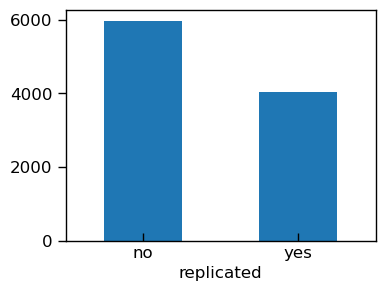

In [22]:
#我们可以通过画图来查看这些被投放研究的可重复性比例。
article_sim['replicated'].value_counts().plot.bar()
plt.xticks(rotation=0)
plt.show()

3. 接下来我们需要模拟10000项研究使用确切语言风格的情况，  
- 和之前相同，不可重复研究使用确切语言风格的可能性为45% ，  
- 可重复研究使用确切语言风格的可能性为56% 

In [26]:
# 设置条件概率
article_sim['data_model'] = np.where(article_sim['replicated'] == 'no', 0.45, 0.56)

# 定义研究是否使用确切语言
data = ['certain', 'uncertain']

# 设置随机种子，以便得到重复的结果
rng=np.random.default_rng(84735)
# 生成确切语言相关的数据
article_sim['language'] = article_sim.apply(lambda x: rng.choice(data, 1, p = [x.data_model, 1-x.data_model])[0], axis=1)

In [30]:
# 显示每个类别研究数量
(
  article_sim.groupby(['language', 'replicated'])
    .size()
    .unstack(fill_value=0)
)

replicated,no,yes
language,,
certain,2643,2340
uncertain,3330,1687


4. 计算后验值  

还记得我们的先验概率为：  
- 可重复研究  $P(B)=0.4$  
- 不可重复性研究 $P(B^c)=0.6$,  

由以上结果可计算似然：  
- 大约58.1%(2340/(2340+1687))的可重复性研究使用了确切语言, $P(A|B)=0.581$  
- 44.2%的不可重复性研究使用确切语言(2643/(3330+2643)), $P(A|B^c)=0.442$

结合先验和似然，我们可以进一步计算分母(边际概率)：  
- $L(B|A)*P(B) + L(B^{c}|A)*P(B^{c}) = 0.581*0.4 + 0.442*0.6 = 0.2324 + 0.2652 ≈ 0.498$  

最后，我们可以计算得到的后验 (使用确切语言研究中，可重复性研究的概率)：  
- $P(B|A) ={\frac{L(B|A)*P(B)}{P(A)}}= (0.581*0.4)/0.498 ≈ 0.467$  
- 在10000项研究中，使用确切语言的研究有4980篇(分母)  
- 而现在，我们可以知道，在使用确切语言的研究中，47%(2340/4980)的研究为可重复研究

In [31]:
usage_yes = article_sim[article_sim['language'] == 'certain']
print('使用确切语言的研究', usage_yes['replicated'].value_counts().sum())
usage_yes['replicated'].value_counts()

使用确切语言的研究 4983


replicated
no     2643
yes    2340
Name: count, dtype: int64

同样地，通过画图来可视化使用确切语言的研究的情况

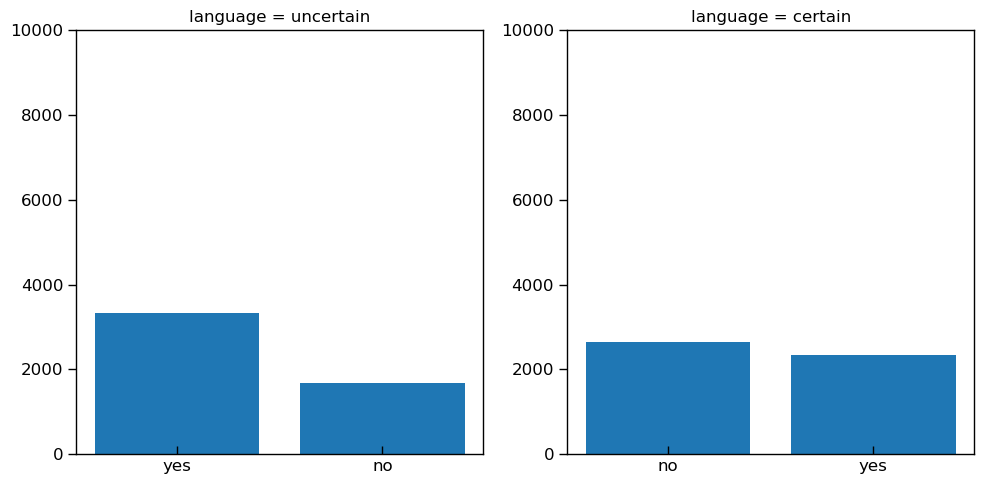

In [32]:
# 定义两幅图的坐标
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 绘制两幅图
for i, u in enumerate(article_sim['language'].unique()):
    ax = axes[i]
    data = article_sim[article_sim['language'] == u]
    ax.bar(data['replicated'].unique(), data['replicated'].value_counts())
    ax.set_title(f'language = {u}')
    ax.set_ylim(0, 10000) 

# 显示   
fig.tight_layout()
plt.show()

### 总结 (Recap)  

回到之前的问题：如何预测研究的可重复性？  



![Image Name](https://cdn.kesci.com/upload/sjq96jfv8f.png?imageView2/0/w/960/h/960)  



- 哪些信念可以作为先验概率？  
- 信息的哪些属性可以作为数据？  
- 如何结合先验和数据更新信念 (贝叶斯公式)。  

## Part3 随机变量的贝叶斯模型

**随机变量 (random variables)**  

在之前的分析中，我们讨论的是对某项研究的“可重复性”这样一个单一事件。  

同样的逻辑可以应用于更加抽象和一般性的**随机变量**进行分析。  

假设为了研究可重复性问题，一个有能力且资金充足的研究团队计划进行一系列可重复性实验，他们希望知道这些实验成功重复的比例是多少。  

首先我们来了解一个概念，胜率或成功率  

* 想象你玩斗地主，有五局三胜，七局四胜这一说，一轮玩下来，就会出现胜率。  
* 然而，胜率并不是一成不变的，它会随着每次游戏的输赢而变化。  
* 在每一轮开始前，你并不会知道你这次的胜率是多少  

在我们的例子中，假设计划对6项研究进行重复实验。  
- 假设该团队对于任何研究成功复现的成功率为$\pi$，$\pi$是**未知的且可能会变化**，所以$\pi$是一个随机变量。  
- 根据团队先前的经验以及心理学研究的现状，我们猜测其成功复现的成功率为 $\pi = 50\%$。  
- 他接下来可能成功复现的次数$Y$可能是0，可能是1，也可能是6，可以有7种可能的成功复现次数，$Y \in \{0,1,2,3,4,5,6\}$ 

🤔虽然我们知道他们的平均成功率为 $\pi = 50\%$，但问题在于，对于每一种复现成功的次数（1 ～ 6），其可能性分别是多少呢？ 

**二项式模型**  

由于每次重复实验，结果只有两种可能：成功 vs 失败。  

该团队总共进行6次重复实验，我们想要知道的是成功1次，成功2次，成功3次，...，的概率。  

对于这种情况，我们可以用二项分布来分析。  


该团队的成功率为$\pi$，$在\pi$下某成功次数发生的概率可表示为：  

$$  
f(y|\pi) = \binom{n}{y} \pi^{y}(1-\pi)^{n-y} \quad\quad for\;y \in \{0,1,2,...,n\}  
$$  
$$  
\binom{n}{y} = \frac{n!}{y!(n-y)!}  
$$  

$\pi$ 表示成功的可能性，$y$表示在$n$个试次中成功的次数，二项模型含有的前提假设是：  

(1) 所有试次发生都是相互独立的  

(2) 在每个试次中，成功的概率都是一个固定的值$\pi$  

成功次数为0~6 的可能性可以分别写成：  

$$  
f(Y=0|\pi=0.5) = \binom{6}{0} 0.5^0 (1-0.5)^{6}  
$$  
$$  
f(Y=1|\pi=0.5) = \binom{6}{1} 0.5^1 (1-0.5)^{5}  
$$  
$$  
...  
$$  
$$  
f(Y=5|\pi=0.5) = \binom{6}{5} 0.5^{5} (1-0.5)^{1}  
$$  
$$  
f(Y=6|\pi=0.5) = \binom{6}{6} 0.5^{6} (1-0.5)^{0}  
$$  

我们可以使用代码帮助计算  
 `st.binom.pmf(y, n, p)`。其中 p 对应公式中的 $\pi$。

In [14]:
# 导入数据加载和处理包：pandas
import pandas as pd
# 导入数字和向量处理包：numpy
import numpy as np
# 导入基本绘图工具：matplotlib
import matplotlib.pyplot as plt
# 导入高级绘图工具 seaborn 为 sns
import seaborn as sns
# 导入统计建模工具包 scipy.stats 为 st
import scipy.stats as st 

# 设置APA 7的画图样式
plt.rcParams.update({
    'figure.figsize': (4, 3),      # 设置画布大小
    'font.size': 12,               # 设置字体大小
    'axes.titlesize': 12,          # 标题字体大小
    'axes.labelsize': 12,          # 轴标签字体大小
    'xtick.labelsize': 12,         # x轴刻度字体大小
    'ytick.labelsize': 12,         # y轴刻度字体大小
    'lines.linewidth': 1,          # 线宽
    'axes.linewidth': 1,           # 轴线宽度
    'axes.edgecolor': 'black',     # 设置轴线颜色为黑色
    'axes.facecolor': 'white',     # 轴背景颜色（白色）
    'xtick.direction': 'in',       # x轴刻度线向内
    'ytick.direction': 'out',      # y轴刻度线向内和向外
    'xtick.major.size': 6,         # x轴主刻度线长度
    'ytick.major.size': 6,         # y轴主刻度线长度
    'xtick.minor.size': 4,         # x轴次刻度线长度（如果启用次刻度线）
    'ytick.minor.size': 4,         # y轴次刻度线长度（如果启用次刻度线）
    'xtick.major.width': 1,        # x轴主刻度线宽度
    'ytick.major.width': 1,        # y轴主刻度线宽度
    'xtick.minor.width': 0.5,      # x轴次刻度线宽度（如果启用次刻度线）
    'ytick.minor.width': 0.5,      # y轴次刻度线宽度（如果启用次刻度线）
    'ytick.labelleft': True,       # y轴标签左侧显示
    'ytick.labelright': False      # 禁用y轴标签右侧显示
})

In [15]:
y = [0,1,2,3,4,5,6]  # 成功次数 
n = 6                # 重复研究总次数
p = 0.5              # 假设的成功概率

# 计算概率值
prob = st.binom.pmf(y, n, p)

result_table = pd.DataFrame({"成功次数":y, "概率":prob})
result_table

显然，当团队的成功概率为 0.5 时，其在六次研究中获得 *y* = 3 次成功的概率最高(*p* = 0.3125)。

In [16]:
# 绘制灰色竖线
for i, j in zip(y , prob):
    plt.plot([i, i], [j, 0], 'gray', linestyle='-', linewidth=1, zorder=1, )

# 绘制黑色点(各成功率次数的成功率)
plt.scatter(y, prob, c='black')

plt.ylabel('$f(y|\pi)$')
plt.xlabel('y')

plt.xlim(-0.2,6.2)
plt.ylim(0,0.5)
plt.show()


**概率质量函数(probability mass function, pmf)：** 用来描述离散型随机变量在各特定取值上的概率  

在上图中我们看到，成功次数y在不同的取值上的概率不同。  

* 由于$y$的个数是有限的，并且是随机发生的，我们把$y$称为离散型随机变量，而$y$发生的概率$f(y)$则被称为概率质量函数  


对于离散型随机变量$Y$，$Y$各取值的概率由$f(y)$指定：  
$$  
f(y) = P(Y=y)  
$$  

并且有如下性质：  

* 对所有y的取值来说，$0\leq f(y) \leq 1$  
* $\sum_{all\,\pmb{y}}f(y) = 1$，y取值的所有概率之和为1

In [17]:
sum(result_table['概率'])

### 二项似然函数(The Binomial likelihood function)

**不同的信念**  

虽然我们认为该团队重复6个实验的成功率是50%，但并非所有人都这么认为。    

- 乐观派认为该团队的成功概率为 0.8，表示对实验成功复现持高度信心。  
- 悲观派则认为该团队的成功概率仅为 0.2，意味着对实验成功复现不太乐观。  

成功的概率影响着他们对研究复现结果的预期：如果团队的成功概率高，那么6次研究中成功复现的次数会更多；  
反之，如果成功概率低，那么研究复现的失败次数就会更多。  

我们可以计算持不同信念的人心中，该团队在6项研究中成功复现的次数的概率分布并画图。

In [18]:
y = [0,1,2,3,4,5,6]  # 成功次数 
n = 6                # 研究总次数

# 计算似然值
p = 0.5              # 本团队假设的成功复现概率
likelihood1 = st.binom.pmf(y, n, p)
p = 0.8              # 乐观派的成功概率
likelihood2 = st.binom.pmf(y, n, p)
p = 0.2              # 悲观派眼中的成功概率
likelihood3 = st.binom.pmf(y, n, p)

result_table = pd.DataFrame({
  "成功次数":y, 
  "本团队(pi=0.5)":likelihood1, 
  "悲观派(pi=0.2)":likelihood2, 
  "乐观派(pi=0.8)":likelihood3})
result_table

In [19]:
# 创建子图
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

# 绘制三个图,每个子图类似原图
three_pi = ["Team itself ($\pi = 0.5$)","Optimists ($\pi = 0.8$)","Pessimists ($\pi = 0.2$)"]
likelihoods = [likelihood1, likelihood2, likelihood3]
for i, ax in enumerate(axs):
    
    ax.scatter(y, likelihoods[i], c='black')
    
    for xx, yy in zip(y, likelihoods[i]):
        ax.plot([xx, xx], [yy, 0], 'gray', linestyle='-', linewidth=1, zorder=1)
    
    # 添加facet
    ax.set_title(three_pi[i])

    ax.set_xlim(-0.2,6.2)
    ax.set_ylim(0,0.4)

fig.supylabel('$f(y|\pi)$')
fig.supxlabel('y')
plt.tight_layout()
plt.show()

显然，对于乐观派来说，团队取得六次成功的概率远高于其他成功次数。而对于悲观派来说，团队全败的可能性远高于其他成功次数。  
- 换句话说，若团队在6项研究中仅成功复现一次，这种情况在低成功率下(悲观派设想的情境)更可能出现，在高成功率下(乐观派设想的情境)几乎不可能出现。  
- 那么团队成功重复的成功率率，更可能(likelihood)是悲观派设想的那样($\pi = 0.2$)。  

例如，在乐观派和悲观派眼中(不同成功率$\pi$下)，6项研究只成功1次的可能性(即似然，likelihood)。  

In [20]:
# 定义成功次数和研究总次数
y = 1  # 成功次数，作为数组处理以便向量化计算
n = 6  # 研究总次数

# 计算似然值，对于三种不同的成功概率 p
p_values = [0.5, 0.8, 0.2]          # 定义三种成功率
likelihoods = []                    # 用于存储每种成功率的似然值结果

for p in p_values:
    likelihood = st.binom.pmf(y, n, p)  # 使用st.binom.pmf计算似然值
    likelihoods.append(likelihood)      


# 创建图形和子图
fig, ax = plt.subplots()  
ax.scatter(p_values, likelihoods, c='black')
# 设置x轴和y轴的限制应该在绘制线条之前完成，以避免重复设置
ax.set_xlim(-0.2, 1.2)  # x轴范围根据p_values调整，最大不应超过1
ax.set_ylim(0, 0.5)
for xx, yy in zip(p_values, likelihoods):
    ax.plot([xx, xx], [0, yy], 'gray', linestyle='-', linewidth=1, zorder=1)
    # 注意这里的顺序是 [0, yy] 而不是 [yy, 0]，因为我们希望从x轴画到对应的似然值
# 设置坐标轴标签，直接使用ax的方法，而不是fig的方法
ax.set_ylabel('$f(\pi|y)$')  
ax.set_xlabel('$\pi$')       
plt.tight_layout()  # 调整布局以避免标签重叠
plt.show()

**似然函数**  

当团队只成功复现一次时，该事件在不同成功率下出现的可能性可以写为：  

$$  
f(Y=1|\pi=0.2) = \binom{6}{1} 0.2^1 (1-0.2)^{5}  
$$  
$$  
f(Y=1|\pi=0.5) = \binom{6}{1} 0.5^1 (1-0.5)^{5}  
$$  
$$  
f(Y=1|\pi=0.8) = \binom{6}{1} 0.8^1 (1-0.8)^{5}  
$$  

因此，成功复现次数为1时的似然函数可以写成  

$$  
L(\pi|y=1) = f(y=1|\pi) = \binom{6}{1} \pi^{1}(1-\pi)^{6-1} = 6\pi(1-\pi)^{5}  
$$  

不同成功率下的似然：  

| $\pi$          | 0.2   | 0.5   | 0.8   |  
|---------------|-------|-------|-------|  
| $L(\pi \| y=1)$ | 0.3932 | 0.0938 | 0.0015 |  




**注意：**  

似然函数表示的是，在各种可能的成功率$\pi$下,成功次数$Y=1$的可能性，所以  
1. 该似然函数公式只取决于$\pi$  
2. 似然函数的总和加起来不为1（从条件概率的公式来看，似然函数的分母是不同的）

#### 条件概率 VS 似然函数  

🤓  
当$\pi$是一定时，条件概率质量函数$f(·|\pi)$可以帮我们计算在$\pi$取值下（各种模型），不同的数据$Y$(e.g., $y_{1},y_{2}$)发生的可能性。  
$$  
f(y_{1}|\pi) \; vs \; f(y_{2}|\pi)  
$$  

当$Y = y$一定时，似然函数$L(·|y)= f(y|·)$允许我们比较在各种不同的模型，即二项式的$\pi$取值(e.g., $\pi_{1},\pi_{2}$)下，观察到这个数据$y$的可能性(relative likelihood)。  


$$  
L(\pi_{1}|y) \; \text{与} \; L(\pi_{2}|y)  
$$  
$$  
\text{即}  
$$  
$$  
f(y|\pi_{1}) \; \text{与} \; f(y|\pi_{2})  
$$  


**在二项分布模型下...**  

进行$n = 6$个重复实验时，成功次数与成功率的关系符合二项式模型，可以用如下的形式来表示：  

$$  
Y|\pi \sim Bin(6,\pi)  
$$  


$$  
f(y|\pi) = \binom{6}{y} \pi^{y}(1-\pi)^{6-y} \quad\quad for\;y \in \{0,1,2,3,4,5,6\}  
$$  

-----------------------------------  

下图给出了几种 $\pi$的取值，我们可以通过概率模型得到每种$Y$发生的可能性。  
* 同时，我们可以看到，Y=1(赢一次)这一特定的数据模式，在各个$\pi$取值(模型)下的似然。  

In [21]:
# Values for Y (number of successes in n trials)
y = np.arange(0, 7)
# Number of trials (n) and different probabilities (π values)
n = 6
pi_values = [0.2, 0.5, 0.8]

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
# Loop over each pi value to plot the corresponding binomial distribution
for i, pi in enumerate(pi_values):
    # Calculate binomial probabilities for each y (number of successes)
    likelihoods = st.binom.pmf(y, n, pi)
    
    # Scatter plot of the likelihoods
    axs[i].scatter(y, likelihoods, color='black', zorder=2)
    
    # Draw gray vertical lines
    for yy, likelihood in zip(y, likelihoods):
        axs[i].plot([yy, yy], [0, likelihood], color='gray', linestyle='-', linewidth=1, zorder=1)
    
    # Highlight y = 1 with a black line
    axs[i].plot([1, 1], [0, st.binom.pmf(1, n, pi)], color='black', linewidth=3, zorder=3)
    
    # Title with binomial parameters
    axs[i].set_title(f'Bin({n},{pi})')
    
    # Set y and x axis limits
    axs[i].set_xlim(-0.5, 6.5)
    axs[i].set_ylim(0, 0.5)

# Global labels
fig.supylabel(r'$f(y|\pi)$')
fig.supxlabel('y')

# Adjust layout for better fit
plt.tight_layout()
plt.show()

### 先验概率模型(**Prior** probability model)

**建立先验模型**  

从前面的描述可以看到，二项分布的参数$\pi$也可以变化，也可以成为一个随机变量。  

- 例如，我们想当一个更有深度的观察者，融合了乐观派、悲观派和中立者三者关于$\pi$的估计。  
- 但是，我们对三种观点的可能性有不同的信念。  

假如我们总体上是一个乐观派，但不排除悲观派的观点，我们给三派观点分配了一定的概率(先验)。  
- 例如，设定 $\pi_{0.2} = 0.1$， 或者 $\pi_{0.2} = 0.5$。 但需要所有$f(\pi)$的总和为1。  


| $\pi$	    |0.2  |0.5 |0.8 |Total  
|---------- |-----|----|----|-----|  
|$f(\pi)$   |0.10  |0.25 |0.65   |1|  



我们设定的$\pi$ 的数量也是可以变化的。  

- 例如，我们还可以将一种非常悲观的可能性也纳入进来，认为该团队成功率为0.01，即 $\pi = 0.01$。  
- 那么新形成的先验分布可能如下。  

 
| $\pi$    |   0.01  | 0.2  | 0.5  | 0.8  | Total |  
| -------- | --- | ---- | ---- | ---- | ----- |  
| $f(\pi)$ |  0.10   | 0.10 | 0.25 | 0.55 | 1     |  




### 后验概率模型(Posterior probability model)

前述第一个先验模型，我们总体上是乐观的，认为团队高成功率的可能性很高 ($\pi_{0.8} = 0.65$)。  



| $\pi$	    |0.2  |0.5 |0.8 |Total  
|---------- |-----|----|----|-----|  
|$f(\pi)$   |0.10  |0.25 |0.65   |1|  



然而，最终结果发现：该团队只成功复现一次。  

这个新的数据会如何改变我们的信念？

**后验模型的计算过程**  

上图所表示的后验可写成：  

$$  
f(\pi|y=1)  
$$  

表示当团队只赢成功复现一项研究时，他成功率$\pi$的概率分布  

根据贝叶斯公式，我们可以进一步对后验概率公式进行展开：  

$$  
posterior = \frac{ prior*likelihood} {normalizing\;\;constant}  
$$  

$$  
f(\pi|y=1) = \frac{ f(\pi)L(\pi|y=1)} {f(y=1)} \quad\quad for\;\pi \in {0.2,0.5,0.8}  
$$  

$$  
f(\pi=0.2|y=1) = \frac{0.10 \times 0.3932} {0.0637} \approx 0.617  
$$  
$$  
f(\pi=0.5|y=1) = \frac{0.25 \times 0.0938} {0.0637} \approx 0.368  
$$  
$$  
f(\pi=0.8|y=1) = \frac{0.65 \times 0.0015} {0.0637} \approx 0.015  
$$ 



下表对后验概率模型进行了总结，我们可知，经过了先前只成功了一项研究的复现经历后，该团队取得成功($\pi$=0.8)的可能性已经从0.65降到了0.015  


| $\pi$	        |0.2    |0.5    |0.8 |Total  
|---------------|-----  |----   |----|-----|  
|$f(\pi)$   |0.10  |0.25 |0.65|1|  
|$f(\pi \| y=1)$   |0.617  |0.368 |0.015|1|  


**补充材料**  

省略分母的计算  
- 在贝叶斯统计中，后验概率的计算公式是：

$$
P(\pi|y) = \frac{P(y|\pi) \cdot P(\pi)}{P(y)} \propto P(y|\pi) \cdot P(\pi)
$$

- **$P(\pi|y)$** 是后验概率。
- **$P(y|\pi)$** 是似然函数。
- **$P(\pi)$** 是先验概率。
- 分母 **$P(y)=\int P(y|\pi) \cdot P(\pi) d \theta$** 是边际似然。

由于分母 **$P(y)$**（边际似然）在不同参数 **$\pi$** 下是一个常数，因此在比较不同后验概率时，我们可以省略这个常数，因为它对所有的后验概率是相同的。



因此，虽然我们计算的值并不总和为 1，但它们的比例关系没有改变，仍然可以用于比较不同参数下的后验概率。这就是为什么我们可以只关注 **$P(y|\pi) \cdot P(\pi)$** 而不需要计算完整的后验概率。

那么既然$f(y)$是一个用来标准化的常数，它并不受$\pi$的影响，那么后验概率质量函数$f(\pi|y)$ 就与$f(\pi)$和$L(\pi|y)$成正比  

$$  
f(\pi | y) = \frac{f(\pi)L(\pi|y)}{f(y)} \propto f(\pi)L(\pi|y)  
$$  
即，  

$$  
posterior \propto prior⋅ likelihood  
$$  

省略分母后验的计算可写成：  
$$  
f(\pi=0.2|y=1) \propto 0.10⋅0.3932  =0.039320  
$$  

$$  
f(\pi=0.5|y=1) \propto 0.25⋅0.0938 = 0.023450  
$$  
$$  
f(\pi=0.8|y=1) \propto 0.65⋅0.0015 = 0.000975  
$$  

$\propto$ 表示成比例，尽管这些未经标准化的后验概率总和不等于1  
$$  
0.039320 + 0.023450 + 0.000975 = 0.063745,  
$$  
但它们的比例关系并未改变(见下图)  

**Proportionality**  

既然$f(y)$是一个用来标准化的常数，它并不受$\pi$的影响，那么后验概率质量函数$f(\pi|y)$ 就与$f(\pi)$和$L(\pi|y)$成正比  

$$  
f(\pi | y) = \frac{f(\pi)L(\pi|y)}{f(y)} \propto f(\pi)L(\pi|y)  
$$  
即，  

$$  
posterior \propto prior⋅ likelihood  
$$  

> 😜这个性质很重要。因为分母的计算量往往比较大，需要遍历所有参数，如果参数不止一个，计算量可想而知。因此，如过能不计算分母也能计算后验，那么这样的方法(后面会介绍的MCMC算法)将会非常有实践意义。

In [23]:
# Pi values and corresponding unnormalized posterior data
pi_values = [0.2, 0.5, 0.8]
unnormalized_posterior = [0.03932, 0.02345, 0.00097]  # Unnormalized posterior values
normalized_posterior = [val / sum(unnormalized_posterior) for val in unnormalized_posterior]  # Normalized

# Create subplots for normalized and unnormalized posteriors
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Normalized posterior
axs[0].scatter(pi_values, normalized_posterior, color='black', zorder=2)
for xx, yy in zip(pi_values, normalized_posterior):
    axs[0].plot([xx, xx], [0, yy], color='black', linewidth=3, zorder=1)
axs[0].set_title('Normalized $f(\pi | y=1)$')
axs[0].set_xlim(0.15, 0.85)
axs[0].set_ylim(0, 0.7)

# Unnormalized posterior
axs[1].scatter(pi_values, unnormalized_posterior, color='black', zorder=2)
for xx, yy in zip(pi_values, unnormalized_posterior):
    axs[1].plot([xx, xx], [0, yy], color='black', linewidth=3, zorder=1)
axs[1].set_title('Unnormalized $f(\pi | y=1)$')
axs[1].set_xlim(0.15, 0.85)
axs[1].set_ylim(0, 0.05)

# Set labels and layout
for ax in axs:
    ax.set_xlabel(r'$\pi$')

fig.supylabel('Probability')
plt.tight_layout()
plt.show()

我们可以使用这些未经标准化的后验概率总和作为分母，来对后验概率进行标准化，会得到相同的计算结果。  

$$  
f(\pi = 0.2 | y = 1) = \frac{0.039320}{0.039320 + 0.023450 + 0.000975} \approx 0.617  
$$  

注意，分母为所有似然值的总和，因此后验概率的计算公式还可以写成：  

$$  
f(\pi | y) = \frac{f(\pi)L(\pi|y)}{f(y)} = \frac{f(\pi)L(\pi|y)}{\sum_{\text{all } \pi} f(\pi)L(\pi|y)} .  
$$

### Posterior simulation (with code)

### 1. 定义先验模型  
- 定义多个可能的成功率  
- 定义每个成功率出现的可能性 (注意，其和为1)

In [24]:
import pandas as pd
import numpy as np

# 定义可能的成功率
replicated = pd.DataFrame({'pi':[0.2, 0.5, 0.8]})

# 定义先验模型
prior = [0.10, 0.25, 0.65]

### 2. 模拟在特定成功率下，6项研究中的成功次数  
- 重复这个过程10000次

In [25]:
# 设置随机数种子保证可重复性
np.random.seed(84735)

# 从先验中抽取10000个 pi 值，并生成对应的y值

replicated_sim = replicated.sample(n=10000, weights=prior, replace=True)
replicated_sim['y'] = np.random.binomial(n=6, p=replicated_sim['pi'], size=len(replicated_sim))
replicated_sim.head(10)

In [26]:
#对pi的抽取情况进行总结
replicated_counts =  replicated_sim['pi'].value_counts().reset_index()

replicated_counts.columns = ['pi','n']

replicated_counts['percentage'] = (replicated_counts['n']/len(replicated_sim))

replicated_counts = replicated_counts.sort_values(by='pi')

print(replicated_counts)

### 3.  不同成功率下，不同成功次数的分布情况$f(y|\pi)$

In [27]:
# 导入绘图工具 seaborn
import seaborn as sns
# 通过 facegrid 方法根据不同变量绘制不同的图形
replicated_lik = sns.FacetGrid(replicated_sim,col="pi")
replicated_lik.map(sns.histplot,'y',stat='probability',discrete=True)
plt.tight_layout()
plt.show()

### 4. 查看$y=1$时，对应的$\pi$的分布情况

In [28]:
replicated_post = replicated_sim[replicated_sim['y'] == 1].value_counts()
replicated_post

In [29]:
replicated_post = replicated_sim[replicated_sim['y'] == 1]

replicated_post_plot = sns.histplot(data = replicated_post, x="pi")

#plt.xticks(np.arange(0.2,0.8,0.3))

replicated_post_plot.set(xticks=[0.2,0.5,0.8])
sns.despine()

思考：频率学派(经典统计)会如何处理上述两个问题？  
* 某项研究的可重复性  
* 重复6次的成功率

## Part 4: 频率学派与贝叶斯学派的对比

最近的一篇综述讨论了贝叶斯方法在临床研究设计和分析中的应用，同时比较了贝叶斯与频率主义方法之间的哲学和方法论差异。  


![Image Name](https://cdn.kesci.com/upload/sjzj8nd4te.png?imageView2/0/w/640/h/640)  


论文中展示的一个例子是一项用于治疗严重急性呼吸窘迫综合征（ARDS）的体外膜肺氧合法（ECMO）试验，研究体外膜肺氧合法（ECMO）对严重急性呼吸窘迫综合征（ARDS）的效果。该试验的结果引发了频率学派和贝叶斯学派在同一数据下得出不同结论的讨论。  

> Goligher, E. C., Heath, A., & Harhay, M. O. (2024). Bayesian statistics for clinical research. The Lancet, 404(10457), 1067-1076.

- 频率学派：试验原本计划招募331名患者，但因中期分析未能证明ECMO治疗具有显著益处，最终只招募了249名患者。结果显示，干预组的死亡率为35%，对照组为46%，表面上看治疗效果显著。然而，基于频率学派的统计分析，P值为0.09，并未达到通常的显著性水平（$p$<0.05）。  
- 因此研究者得出结论：试验未能提供充分证据证明早期ECMO可以显著降低死亡率。

- 贝叶斯学派：通过使用不同的先验分布时，H<sub>1</sub>（ECMO可以有效降低干预组死亡率）成立的后验概率在88%至99%之间。  
- 这意味着，贝叶斯方法提供了强有力的证据支持ECMO的效果，甚至有学者建议，ECMO方法应被认为是一种有效的治疗手段。

### 频率学派如何看待这个世界？  


在对比频率学派与贝叶斯学派的差异之前，让我们首先回顾一下频率学派是如何看待这个世界的。

值得注意的是：  

1. 固定的假设：频率学派认为假设（通常是零假设）是一个固定的命题。例如，在试验中，频率学派的零假设是“ECMO对死亡率没有显著影响”。  

2. 数据的随机性：在频率学派的框架下，数据被视为随机变量。通过对这些数据进行分析，频率学派关注在假设为真的前提下，观测到当前数据或更极端数据的概率，即$p$值。  

3. 无限重复实验的假设：频率学派的推断依赖于假设实验可以无限重复进行，进而通过计算在这些重复实验中得到观测数据的频率来推断真相。因此，置信区间也是基于多次实验的频率分布。  

4. 拒绝或接受零假设：通过计算$p$值，频率学派根据预设的显著性水平（通常为0.05）决定是否拒绝零假设。

最后，频率学派如何**推断**出两个总体之间的差异？   
- 频率学派通过零假设的显著性检验(Null hypothesis significant test, NHST)来判断显著性。通过计算置信区间(confidence interval)和$p$值来帮助推断过程。  
- 在该临床试验中，通过$p$值（如，0.09）和置信区间来推断两个总体之间的差异。

### 贝叶斯学派如何看待这个世界？

与频率学派不同，贝叶斯学派认为，概率是对不确定性的主观度量。  
贝叶斯学派的核心思想包括：  
1. 先验概率：贝叶斯学派从研究者对某个假设的初始信念（即先验概率）出发。这一信念可以基于以往研究、专家意见或临床经验。  
2. 更新信念：当新数据（如试验结果）出现时，贝叶斯定理提供了一个框架，将先验概率与新证据（通过似然函数表示）结合，生成后验概率。后验概率代表更新后的信念，即在观察到新数据后，某假设为真的概率。  
3. 后验分布与可信区间(credible intervals)：通过后验概率，贝叶斯方法能够直接评估一个假设为真的可能性。例如，贝叶斯分析可以直接得出H<sub>1</sub>成立的后验概率（如88%）。可信区间的概念也更具直观性，它表示在现有数据和先验信息下，某参数位于该区间内的概率。

#### Thomas Bayes  
![Image Name](https://pic2.zhimg.com/v2-ae48785e2b67af851e236b3d38c78c8d_r.jpg)  


#### Pierre Simon Laplace  

![Image Name](https://th.bing.com/th/id/R.c252b05834293b10a3005882940d6622?rik=Kr8G5HIK%2fObbHw&riu=http%3a%2f%2fimages.fineartamerica.com%2fimages-medium-large%2fpierre-simon-marquis-de-laplace-maria-platt-evans.jpg&ehk=uHIIZ0qdCLmD0FXAHR4lUGfySQGNKlhNkJgoWIOMJG4%3d&risl=&pid=ImgRaw&r=0)  


### 两个学派的差异对比  

| **频率学派**                                           | **贝叶斯学派**                                         |  
|-------------------------------------------------------|-------------------------------------------------------|  
| **概率定义**：概率是事件在无限重复试验中的频率          | **概率定义**：概率是对假设的信念度量                   |  
| **假设**：假设是固定的，数据是随机的                    | **假设**：假设是随机的，数据是固定的                   |  
| **推断方式**：基于假设检验，通过$p$值判断是否拒绝零假设    | **推断方式**：通过更新先验与新数据计算后验概率         |  
| **置信区间**：在重复试验中，95%的区间包含真实参数         | **可信区间**：给出某参数位于区间内的概率（如95%可信度） |  
| **$p$值**：衡量在零假设下，观测数据或更极端数据的概率      | **后验概率**：给出假设为真的更新概率                   |  
| **数据独立性**：推断只基于当前试验数据，不考虑先验信息    | **先验信息**：结合历史数据或专家意见，用于更新推断     |  
| **实验重复性假设**：推断基于实验的假想重复性              | **逐步积累信息**：通过结合新数据不断更新和完善假设     |  
| **适应性**：实验设计固定，不能在中途更新或调整             | **适应性**：可以灵活调整试验设计和决策，如自适应试验   |  

来源：  
> Goligher, E. C., Heath, A., & Harhay, M. O. (2024). Bayesian statistics for clinical research. The Lancet, 404(10457), 1067-1076.

### 贝叶斯的主观性  

**任何统计分析方法都不可能完全客观，因此主观性是一个相对概念:**  

* 贝叶斯学派的主观性通过先验的设定来体现，透明，不易让人产生误解  

* 频率学派的主观性暗含在各种**前提预设**中，比如方差分析中的方差齐性和正态性，这种看似‘客观的’预设，一方面难以满足，一方面也是一种主观的设定。  

* 更为宏观的来说，样本的抽取，数据清理方式的选择，分析方法的选择，$p$值的设定，这些都存在主观性。因此，频率学派并没有想象的那么‘客观’。  

* 主观不一定是坏事：通过量化方法将个体的经验和专家知识整合到数据分析之中。  



#### 重复抽样的不同作用

##### 频率学派  
* 统计推断依赖于参数的**抽样分布**，即只要无限(long-run)的进行抽样，样本分布的参数就会有某种分布形式；  
* 零假设检验（Null Hypothesis Significance Testing，NHST）中的$p$值和置信区间的解读均依赖于“无限次抽样”的预设；  
* 实际操作中，我们往往只会收集一次数据，并不会反复的进行抽样；有些情境中，预设“无限次重复抽样并不合理；  

##### 贝叶斯学派  
* 假定参数本身是分布，不确定性一起存在于推断之中；  
* 直接根据数据对先验信念进行更新；  

**置信区间(confidence intervals) vs 可信区间(credible intervals)**  

**No free lunch: 各有优势和缺陷**

#### 不同的先验和似然会产生不同的后验分布  

![Image Name](https://cdn.kesci.com/upload/image/rhqcb9gji7.png?imageView2/0/w/500/h/500)  


#### NHST的"弱项"

* 无法直接对零假设(null hypothesis)进行支持，即如果两个总体没有显著差异，他们的相似程度有多少？  (许岳培等, 2023, *应用心理学(04)*, 369-384)  

* 一次性只能对比两个总体的假设进行比较；  

* 控制假阳性是一个棘手的问题